In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
orange = cv2.imread('images/orange.jpg')
apple = cv2.imread('images/apple.jpg')
# orange = cv2.cvtColor(orange , cv2.COLOR_RGB2BGR)
# apple = cv2.cvtColor(apple , cv2.COLOR_RGB2BGR)
orange = cv2.resize(orange, (512, 512))
apple = cv2.resize(apple, (512, 512))

print(f'orange shape = {orange.shape}')
print(f'apple shape = {apple.shape}')

print(apple.shape)

print(orange.shape)

apple_orange = np.hstack((apple[:, :256], orange[:, 256:]))



# generate Gaussian pyramid for apple

apple_copy = apple.copy()

gp_apple = [apple_copy]

for i in range(6):

    apple_copy = cv2.pyrDown(apple_copy)       

    gp_apple.append(apple_copy)       





# generate Gaussian pyramid for orange

orange_copy = orange.copy()

gp_orange = [orange_copy]

for i in range(6):

    orange_copy = cv2.pyrDown(orange_copy)      

    gp_orange.append(orange_copy)      



# generate Laplacian Pyramid for apple

apple_copy = gp_apple[5]

lp_apple = [apple_copy]

for i in range(5, 0, -1):

    gaussian_expanded = cv2.pyrUp(gp_apple[i])      

    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)      

    lp_apple.append(laplacian)      



# generate Laplacian Pyramid for orange

orange_copy = gp_orange[5]

lp_orange = [orange_copy]

for i in range(5, 0, -1):

    gaussian_expanded = cv2.pyrUp(gp_orange[i])      

    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)      

    lp_orange.append(laplacian)      



# Now add left and right halves of images in each level

apple_orange_pyramid = []

n = 0

for apple_lap, orange_lap in zip(lp_apple, lp_orange):

    n += 1      

    cols, rows, ch = apple_lap.shape     

    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))     

    apple_orange_pyramid.append(laplacian)     

# now reconstruct

apple_orange_reconstruct = apple_orange_pyramid[0]

for i in range(1, 6):

    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)       

    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)       



cv2.imshow("apple", apple)

cv2.imshow("orange", orange)

cv2.imshow("apple_orange", apple_orange)

cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)

cv2.waitKey(0)

cv2.destroyAllWindows()#close window

orange shape = (512, 512, 3)
apple shape = (512, 512, 3)
(512, 512, 3)
(512, 512, 3)


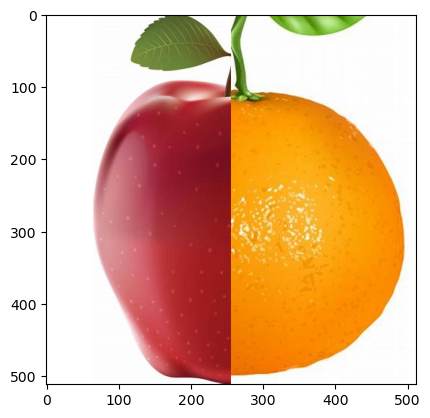

In [ ]:
plt.imshow(apple_orange)


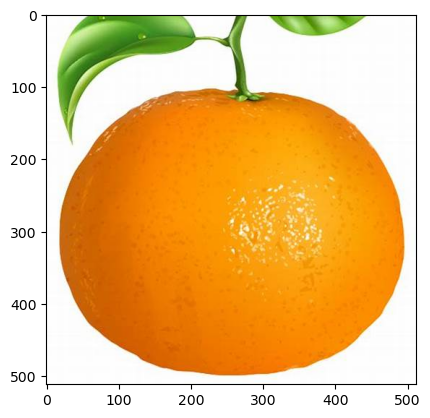

In [ ]:
plt.imshow(orange)